In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['College.csv']


In [2]:
df=pd.read_csv("../input/College.csv", index_col = 0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


              Apps  Accept  Enroll    ...     Expend  Grad.Rate  corr_sum
Enroll        True    True    True    ...      False      False         5
Top10perc    False   False   False    ...       True      False         5
Top25perc    False   False   False    ...       True      False         5
F.Undergrad   True    True    True    ...      False      False         5
Outstate     False   False   False    ...       True       True         6
Expend       False   False   False    ...       True      False         5

[6 rows x 18 columns]
['Enroll' 'Top10perc' 'Top25perc' 'F.Undergrad' 'Outstate' 'Expend']


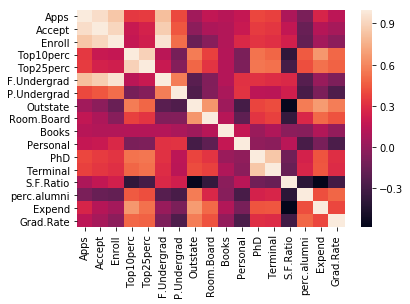

In [4]:
df_corr = df.corr() > 0.5
#df_corr
df_corr["corr_sum"] = df_corr.sum()
df_corr = df_corr[df_corr["corr_sum"] >= 5]
print(df_corr)
print(df_corr.index.values)
sns.heatmap(df.corr())

In [5]:
# df1 = df[df_corr.index.values]
# df1.head()
# df.columns
df1 = df.drop(['Private'], axis =1)
df1.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [6]:
# kmeans=KMeans(n_clusters=2)

In [7]:
# kmeans.fit(df1)

In [8]:
# kmeans.cluster_centers_

In [9]:
# kmeans.labels_

In [10]:
#df["Grad"] = df["Grad.Rate"].apply(lambda x: 1 if x > 75 else(2 if x > 50 else(3 if x > 25 else 4)))
# df["cluster"] = kmeans.labels_
# df.head(50)

# Modelling and Evaluation
## Silhouette Analysis

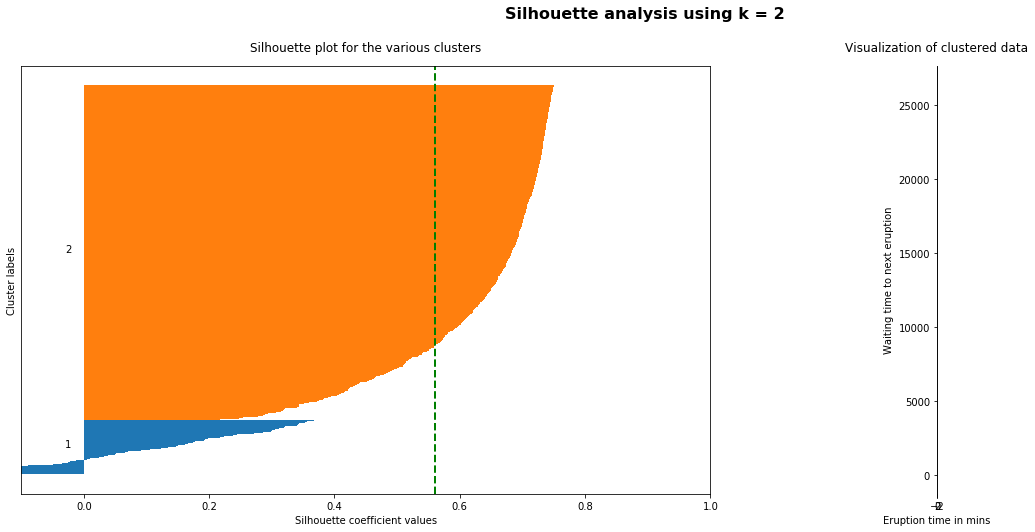

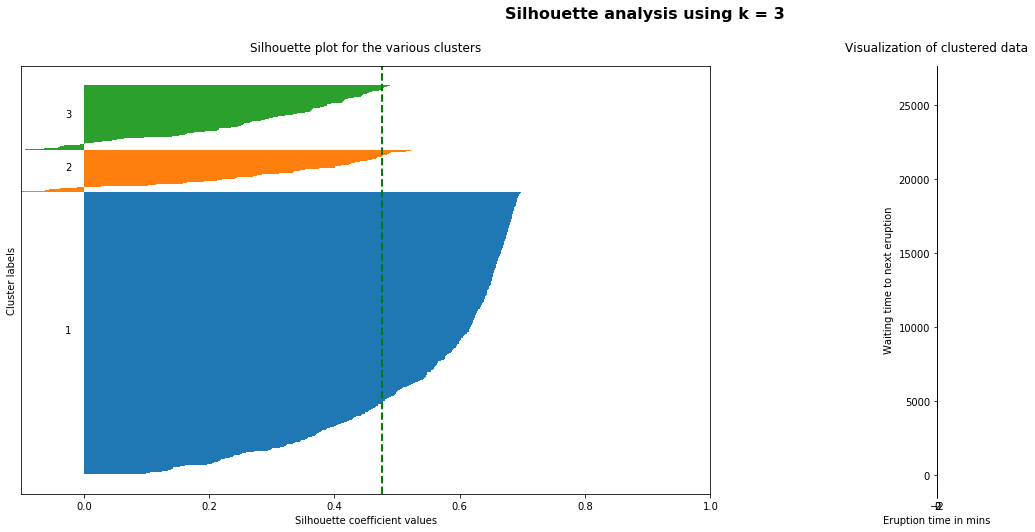

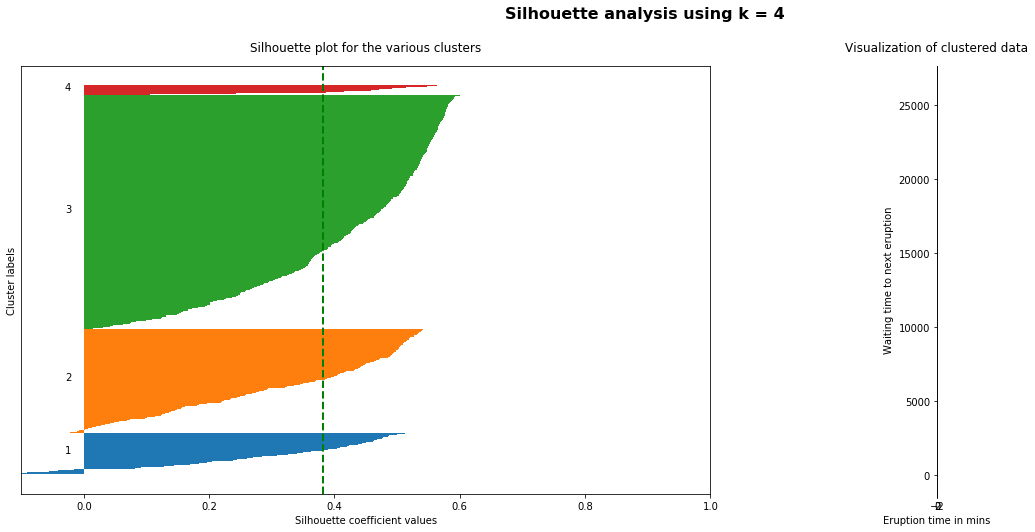

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i,k in enumerate([2,3,4]):
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    #Run the kmeans algorithm
    km = KMeans(n_clusters = k)
    labels = km.fit_predict(df1)
    centroids = km.cluster_centers_
    #take silhouette samples
    silhouette_vals = silhouette_samples(df1, labels)
    #silhouette plots
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df1.values[:, 0], df1.values[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## Elbow Method

[72040559613.94107, 48356202264.492134, 32365874599.916058, 25519276300.920986, 20748569238.09792, 17755828424.35014, 15714098784.75735, 14397703839.259317, 13287640905.677666]


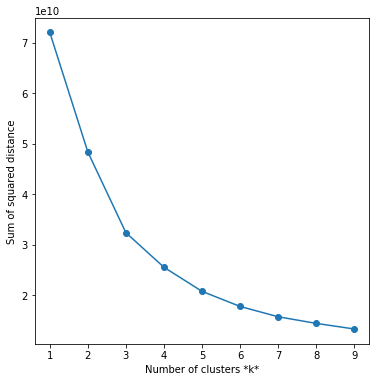

In [12]:
# Run the algorithm and find the index of cluster data points
sse = []
list_k = list(range(1,10))

for k in list_k:
    km = KMeans(n_clusters =k)
    km.fit(df1)
    sse.append(km.inertia_)
print(sse)
#plot sse against k

plt.figure(figsize = (6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');